In [2]:
import pandas as pd
import copy
import warnings
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Load in Data

In [3]:
driver_history_df = pd.read_csv("./f1db_csv/driver_history.csv")
gasly_df = driver_history_df[driver_history_df.driverName == "Pierre Gasly"]
albon_df = driver_history_df[driver_history_df.driverName == "Alexander Albon"]
ver_df = driver_history_df[driver_history_df.driverName == "Max Verstappen"]

In [4]:
gasly_comp_df = gasly_df[(gasly_df.year == 2019) & (gasly_df.constructorName == "Red Bull")]
albon_comp_df = albon_df[(albon_df.year == 2020) & (albon_df.constructorName == "Red Bull")]
ver_2019_df = ver_df[(ver_df.year == 2019)]
ver_2020_df = ver_df[(ver_df.year == 2020)]

## Gasly compared to Verstappen in 2019

In [5]:
gasly_ver_comp = pd.concat([gasly_comp_df, ver_2019_df])
gasly_ver_comp

,Unnamed: 0,driverName,number,nationality,year,name,date,raceId,constructorName,position,minQualifyingTime,racePosition,fastestLapTime,wins,points,driverStanding
6906,6906,Pierre Gasly,10.0,French,2019,Australian Grand Prix,2019-03-17,1010,Red Bull,17,83.020,11.0,87.229,0,0.0,11
6926,6926,Pierre Gasly,10.0,French,2019,Bahrain Grand Prix,2019-03-31,1011,Red Bull,13,89.526,8.0,95.291,0,4.0,10
6944,6944,Pierre Gasly,10.0,French,2019,Chinese Grand Prix,2019-04-14,1012,Red Bull,6,92.930,6.0,94.742,0,13.0,6
6964,6964,Pierre Gasly,10.0,French,2019,Azerbaijan Grand Prix,2019-04-28,1013,Red Bull,20,NaN,NaN,105.712,0,13.0,7
6984,6984,Pierre Gasly,10.0,French,2019,Spanish Grand Prix,2019-05-12,1014,Red Bull,6,76.708,6.0,80.536,0,21.0,6
7004,7004,Pierre Gasly,10.0,French,2019,Monaco Grand Prix,2019-05-26,1015,Red Bull,5,71.041,5.0,74.279,0,32.0,6
7024,7024,Pierre Gasly,10.0,French,2019,Canadian Grand Prix,2019-06-09,1016,Red Bull,5,71.079,8.0,76.157,0,36.0,6
7044,7044,Pierre Gasly,10.0,French,2019,French Grand Prix,2019-06-23,1017,Red Bull,9,90.184,10.0,95.197,0,37.0,6
7064,7064,Pierre Gasly,10.0,French,2019,Austrian Grand Prix,2019-06-30,1018,Red Bull,9,63.988,7.0,68.790,0,43.0,6
7084,7084,Pierre Gasly,10.0,French,2019,British Grand Prix,2019-07-14,1019,Red Bull,5,85.590,4.0,89.544,0,55.0,6


In [6]:
# Reducing this comparison dataset to only the variables we need
gasly_ver_red = gasly_ver_comp.drop(columns = ["Unnamed: 0", "name", "date", "nationality", "number", "year", "constructorName"])

# Pivot the table to directly compare between the two
gasly_ver_pivoted = gasly_ver_red.pivot(index = "raceId", columns = "driverName")
gasly_ver_pivoted

position              minQualifyingTime               \
driverName Max Verstappen Pierre Gasly    Max Verstappen Pierre Gasly   
raceId                                                                  
1010                  4.0         17.0            81.320       83.020   
1011                  5.0         13.0            88.752       89.526   
1012                  5.0          6.0            92.089       92.930   
1013                  4.0         20.0           101.069          NaN   
1014                  4.0          6.0            76.357       76.708   
1015                  3.0          5.0            70.618       71.041   
1016                 11.0          5.0            71.619       71.079   
1017                  4.0          9.0            89.409       90.184   
1018                  3.0          9.0            63.439       63.988   
1019                  4.0          5.0            85.276       85.590   
1020                  2.0          4.0            72.113       72.385   
1021                  1.0          6.0            74.572       75.450   
1022                  5.0          NaN           103.690          NaN   
1023                 20.0          NaN               NaN          NaN   
1024                  4.0          NaN            96.813          NaN   
1025                  4.0          NaN            92.310          NaN   
1026                  5.0          NaN            87.851          NaN   
1027                  1.0          NaN            74.758          NaN   
1028                  3.0          NaN            92.096          NaN   
1029                  1.0          NaN            67.503          NaN   
1030                  3.0          NaN            95.139          NaN   

             racePosition              fastestLapTime               \
driverName Max Verstappen Pierre Gasly Max Verstappen Pierre Gasly   
raceId                                                               
1010                  3.0         11.0         86.256       87.229   
1011                  4.0          8.0         95.311       95.291   
1012                  4.0          6.0         96.143       94.742   
1013                  4.0          NaN        104.794      105.712   
1014                  3.0          6.0         79.769       80.536   
1015                  4.0          5.0         76.229       74.279   
1016                  5.0          8.0         74.767       76.157   
1017                  4.0         10.0         94.162       95.197   
1018                  1.0          7.0         67.475       68.790   
1019                  5.0          4.0         89.272       89.544   
1020                  1.0         14.0         76.645       77.495   
1021                  2.0          6.0         77.103       81.045   
1022                  NaN          NaN            NaN          NaN   
1023                  8.0          NaN         83.143          NaN   
1024                  3.0          NaN        105.176          NaN   
1025                  4.0          NaN         96.937          NaN   
1026                  NaN          NaN         97.249          NaN   
1027                  6.0          NaN         80.406          NaN   
1028                  3.0          NaN         98.214          NaN   
1029                  1.0          NaN         70.862          NaN   
1030                  2.0          NaN        101.119          NaN   

                     wins                      points               \
driverName Max Verstappen Pierre Gasly Max Verstappen Pierre Gasly   
raceId                                                               
1010                  0.0          0.0           15.0          0.0   
1011                  0.0          0.0           27.0          4.0   
1012                  0.0          0.0           39.0         13.0   
1013                  0.0          0.0           51.0         13.0   
1014                  0.0          0.0           66.0         21.0   
1015                  0

In [7]:
# Only look at the races where Gasly was in Red Bull and start comparison ratios and deltas
gasly_ver = gasly_ver_pivoted[gasly_ver_pivoted.index < 1022]
gv_position_diff = gasly_ver.iloc[:, 1] - gasly_ver.iloc[:, 0]
gv_qualifying_ratio = gasly_ver.iloc[:, 3] / gasly_ver.iloc[:, 2]
gv_race_finish_diff = gasly_ver.iloc[:, 5] - gasly_ver.iloc[:, 4]
gv_fastest_lap_ratio = gasly_ver.iloc[:, 7] / gasly_ver.iloc[:, 6]
gv_points_diff = gasly_ver.iloc[:, 10] - gasly_ver.iloc[:, 11]

In [16]:
gv_diff_df = pd.DataFrame({"quali_position_diff" : gv_position_diff, "qualifying_ratio" : gv_qualifying_ratio, 
                           "race_finish_diff" :gv_race_finish_diff, "fastest_lap_ratio" : gv_fastest_lap_ratio,
                           "points_diff" : gv_points_diff})

# Match the raceId back to the race name
gv_diff = pd.merge(driver_history_df[["raceId", "name"]], gv_diff_df, on = "raceId").drop_duplicates()
gv_diff

,raceId,name,quali_position_diff,qualifying_ratio,race_finish_diff,fastest_lap_ratio,points_diff
0,1010,Australian Grand Prix,13.0,1.020905,8.0,1.011280,15.0
20,1011,Bahrain Grand Prix,8.0,1.008721,4.0,0.999790,23.0
40,1012,Chinese Grand Prix,1.0,1.009132,2.0,0.985428,26.0
58,1013,Azerbaijan Grand Prix,16.0,NaN,NaN,1.008760,38.0
78,1014,Spanish Grand Prix,2.0,1.004597,3.0,1.009615,45.0
98,1015,Monaco Grand Prix,2.0,1.005990,1.0,0.974419,46.0
118,1016,Canadian Grand Prix,-6.0,0.992460,3.0,1.018591,52.0
138,1017,French Grand Prix,5.0,1.008668,6.0,1.010992,63.0
158,1018,Austrian Grand Prix,6.0,1.008654,6.0,1.019489,83.0
178,1019,British Grand Prix,1.0,1.003682,-1.0,1.003047,81.0


## Albon compared to Verstappen in 2020

In [17]:
albon_ver_comp = pd.concat([albon_comp_df, ver_2020_df])

# Reducing this comparison dataset to only the variables we need
albon_ver_red = albon_ver_comp.drop(columns = ["Unnamed: 0", "name", "date", "nationality", "number", "year", "constructorName"])

# Pivot the table to directly compare between the two
albon_ver_pivoted = albon_ver_red.pivot(index = "raceId", columns = "driverName")
albon_ver_pivoted

position                minQualifyingTime                 \
driverName Alexander Albon Max Verstappen   Alexander Albon Max Verstappen   
raceId                                                                       
1031                     5              3            63.746         63.477   
1032                     7              2            79.014         77.938   
1033                    13              7            75.715         74.849   
1034                    12              3            86.545         85.325   
1035                     9              4            86.642         86.176   
1036                     6              3            77.029         76.292   
1037                     5              3           102.193        101.778   
1038                     9              5            80.064         79.780   
1039                     4              3            75.914         75.471   

              racePosition                 fastestLapTime                 \
driverName Alexander Albon Max Verstappen Alexander Albon Max Verstappen   
raceId                                                                     
1031                  13.0            NaN          68.432         69.351   
1032                   4.0            3.0          67.299         66.145   
1033                   5.0            2.0          79.440         79.184   
1034                   8.0            2.0          88.689         87.097   
1035                   5.0            1.0          89.477         89.465   
1036                   8.0            2.0          82.194         81.477   
1037                   6.0            3.0         108.736        108.305   
1038                  15.0            NaN          84.926         85.539   
1039                   3.0            NaN          80.039            NaN   

                      wins                         points                 \
driverName Alexander Albon Max Verstappen Alexander Albon Max Verstappen   
raceId                                                                     
1031                     0              0             0.0            0.0   
1032                     0              0            12.0           15.0   
1033                     0              0            22.0           33.0   
1034                     0              0            26.0           52.0   
1035                     0              1            36.0           77.0   
1036                     0              1            40.0           95.0   
1037                     0              1            48.0          110.0   
1038                     0              1            48.0          110.0   
1039                     0              1            63.0          110.0   

            driverStanding                 
driverName Alexander Albon Max Verstappen  
raceId                                     
1031                    13             20  
1032                     8              6  
1033                     5              3  
1034                     6              3  
1035                     6              2  
1036                     6              2  
1037                     4              2  
1038                     6              3  
1039                     5              3

In [11]:
# Compare ratios and deltas
av_position_diff = albon_ver_pivoted.iloc[:, 0] - albon_ver_pivoted.iloc[:, 1]
av_qualifying_ratio = albon_ver_pivoted.iloc[:, 2] / albon_ver_pivoted.iloc[:, 3]
av_race_finish_diff = albon_ver_pivoted.iloc[:, 4] - albon_ver_pivoted.iloc[:, 5]
av_fastest_lap_ratio = albon_ver_pivoted.iloc[:, 6] / albon_ver_pivoted.iloc[:, 7]
av_points_diff = albon_ver_pivoted.iloc[:, 11] - albon_ver_pivoted.iloc[:, 10]

In [18]:
av_diff_df = pd.DataFrame({"quali_position_diff" : av_position_diff, "qualifying_ratio" : av_qualifying_ratio, 
                           "race_finish_diff" :av_race_finish_diff, "fastest_lap_ratio" : av_fastest_lap_ratio,
                           "points_diff" : av_points_diff})

av_diff = pd.merge(driver_history_df[["raceId", "name"]], av_diff_df, on = "raceId").drop_duplicates()
av_diff

,raceId,name,quali_position_diff,qualifying_ratio,race_finish_diff,fastest_lap_ratio,points_diff
0,1031,Austrian Grand Prix,2,1.004238,NaN,0.986749,0.0
20,1032,Styrian Grand Prix,5,1.013806,1.0,1.017447,3.0
40,1033,Hungarian Grand Prix,6,1.011570,3.0,1.003233,11.0
60,1034,British Grand Prix,9,1.014298,6.0,1.018278,26.0
80,1035,70th Anniversary Grand Prix,5,1.005408,4.0,1.000134,41.0
100,1036,Spanish Grand Prix,3,1.009660,6.0,1.008800,55.0
120,1037,Belgian Grand Prix,2,1.004078,3.0,1.003980,62.0
140,1038,Italian Grand Prix,4,1.003560,NaN,0.992834,62.0
160,1039,Tuscan Grand Prix,1,1.005870,NaN,NaN,47.0


## Direct Comparisons with Gasly and Albon

### Graphs of Quali Ratios and Fastest Lap Ratios over time

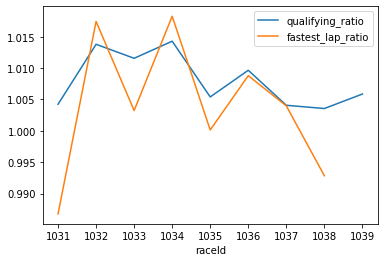

In [13]:
# Plot the qualifying ratio and fastest lap ratio over time
av_diff.plot(x = "raceId", y = ["qualifying_ratio", "fastest_lap_ratio"])

### Mean and Median Differences

In [20]:
albon_ver_mean_diff = av_diff_df.mean()
albon_ver_mean_diff

quali_position_diff     4.111111
qualifying_ratio        1.008054
race_finish_diff        3.833333
fastest_lap_ratio       1.003932
points_diff            34.111111
dtype: float64

In [21]:
gasly_ver_mean_diff = gv_diff_df.mean()
gasly_ver_mean_diff

quali_position_diff     4.583333
qualifying_ratio        1.007123
race_finish_diff        4.454545
fastest_lap_ratio       1.008636
points_diff            58.083333
dtype: float64

In [22]:
av_diff_df.median()

quali_position_diff     4.000000
qualifying_ratio        1.005870
race_finish_diff        3.500000
fastest_lap_ratio       1.003606
points_diff            41.000000
dtype: float64

In [23]:
gv_diff_df.median()

quali_position_diff     3.500000
qualifying_ratio        1.008654
race_finish_diff        4.000000
fastest_lap_ratio       1.010303
points_diff            49.000000
dtype: float64

In [59]:
mean_diff_df = pd.DataFrame({"gasly_verstappen" : gasly_ver_mean_diff, "albon_verstappen" : albon_ver_mean_diff})
mean_diff_df

,gasly_verstappen,albon_verstappen
position_diff,4.583333,4.111111
qualifying_ratio,1.007123,1.008054
race_finish_diff,4.454545,3.833333
fastest_lap_ratio,1.008636,1.003932
points_diff,58.083333,34.111111
